### Model: 

[Phenotypic Diversity, Population Growthn and Information in Fluctuating Enviroments, Edo Kussell and Stanislas Leiber]

$$
\Large 
x'(t) = A_{\epsilon(t)} x(t)
$$

where $\epsilon(t)$ is a stochastic process and  

$$
\Large
A_k = 
\begin{bmatrix}
f_1^{(k)} - H_{11} & \cdots & 0 \\
 \cdots & f_2^{(k)} - H_{22} & \cdots \\
 0 & \cdots & f_3^{(k)} - H_{33}
\end{bmatrix}
$$


In the matrix, $f_j^{(k)}$ is the growth rate of phenotype $j$ in enviroment $k$. 


### Goal: 

Study the distribution of $x_j(t)$.

### Idea: 

The Lyapunov exponent of the model has an expansion with terms that are similar to the boosting algo. 

# $\epsilon(t)$

Is a markov chain described by an undirected graph with different weights on the edges. In this case the stationary distribution is 

$$
\Large 
S_i = \dfrac{\sum_k w_{ik}}{\sum_i\sum_k w_{ik}}
$$

Also, if we choose an irreducible chain, $S_i = \dfrac{1}{r_i}$, where $r_i$ is the average return time to state $i$ - starting from $i$.

The transistion probabilities are 

$$
\Large 
q_{ij} = \dfrac{w_{ij}}{\sum_k w_{ik}}
$$

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pylab as plt

In [2]:
E1 = np.array([[0, 1, 2, 0], 
               [1, 0, 1, 0],
               [2, 1, 0, 3],
               [0, 0, 3, 0]])

In [3]:
row_sums = E1.sum(axis=1).reshape(4, 1)
Q1 = E1 / row_sums

Q1

array([[0.        , 0.33333333, 0.66666667, 0.        ],
       [0.5       , 0.        , 0.5       , 0.        ],
       [0.33333333, 0.16666667, 0.        , 0.5       ],
       [0.        , 0.        , 1.        , 0.        ]])

In [4]:
# Number of time steps
T = 100

#initial state
enviroment = np.random.choice(range(1, 4))
chain = np.zeros(T) 

In [5]:
for t in range(T):
    sample = np.random.multinomial(1, Q1[enviroment], size = 1)
    enviroment = np.argmax(sample)
    chain[t] = enviroment

print(chain)

[2. 0. 2. 3. 2. 3. 2. 1. 2. 0. 2. 3. 2. 0. 2. 0. 2. 3. 2. 1. 0. 1. 0. 2.
 0. 2. 3. 2. 0. 2. 3. 2. 3. 2. 0. 2. 3. 2. 1. 2. 3. 2. 0. 2. 0. 1. 2. 0.
 1. 2. 1. 2. 1. 2. 0. 1. 0. 2. 3. 2. 3. 2. 1. 2. 1. 2. 1. 2. 3. 2. 0. 2.
 3. 2. 3. 2. 3. 2. 3. 2. 0. 2. 0. 1. 2. 1. 0. 2. 3. 2. 3. 2. 3. 2. 1. 2.
 3. 2. 3. 2.]


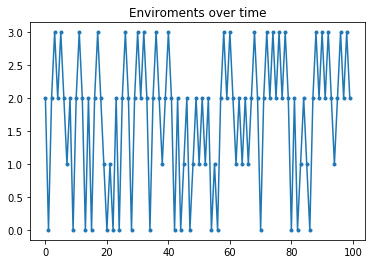

In [6]:
plt.plot(chain, '.-')
plt.title('Enviroments over time')
plt.show()

In [15]:
def next_enviroment(intitial_env, Q):
    '''
    Given an initial state, computes the next state in a markov chain with transition matrix Q. 
    '''
    sample = np.random.multinomial(1, Q[intitial_env], size = 1)
    next_env = np.argmax(sample)
    return(next_env)

# $A_{\epsilon(t)}$

$$
\Large
A_k = 
\begin{bmatrix}
f_1^{(k)} - H_{11} & \cdots & 0 \\
 \cdots & f_2^{(k)} - H_{22} & \cdots \\
 0 & \cdots & f_3^{(k)} - H_{33}
\end{bmatrix}
$$

In [8]:
# The matrix for P phenotypes

P = 4

H = np.diag([0.5]*P)
F = linalg.toeplitz([1, 0.2, 0.2, 0.2]) # only one strong phenotype for each enviroment
F = F[0:4, ] # only 4 enviroments

F

array([[1. , 0.2, 0.2, 0.2],
       [0.2, 1. , 0.2, 0.2],
       [0.2, 0.2, 1. , 0.2],
       [0.2, 0.2, 0.2, 1. ]])

In [9]:
# A_k for any enviroment

enviroment = 3

A = np.diag(F[enviroment]) - H
A

array([[-0.3,  0. ,  0. ,  0. ],
       [ 0. , -0.3,  0. ,  0. ],
       [ 0. ,  0. , -0.3,  0. ],
       [ 0. ,  0. ,  0. ,  0.5]])

# $x'(t) = A_{\epsilon(t)} x(t)$

In fact, I'll use an Euler approximation: 

$$
\Large 
x(t + 1) = \left(\Delta t A_{\epsilon(t)} - I\right) x(t)
$$

as a first model. 

In [10]:
# 4 enviroments:
print('Q=\n', Q1)

# 6 phenotypes:
print('F=\n', F)

Q=
 [[0.         0.33333333 0.66666667 0.        ]
 [0.5        0.         0.5        0.        ]
 [0.33333333 0.16666667 0.         0.5       ]
 [0.         0.         1.         0.        ]]
F=
 [[1.  0.2 0.2 0.2]
 [0.2 1.  0.2 0.2]
 [0.2 0.2 1.  0.2]
 [0.2 0.2 0.2 1. ]]


In [24]:
# x0[j]: Initial populition with phenotype j
x0 = np.array([1, 1, 1, 1])

# initial enviroment
enviroment = np.random.choice(range(4))

In [25]:
T = 50
Dt = 1

X = np.zeros((T, P))

for t in range(T):
    A = np.diag(F[enviroment]) - H
    X[t] = (A/Dt - np.diag([1]*P)).dot(x0)
    
    # updates for next time-step
    x0 = X[t]
    enviroment = next_enviroment(enviroment, Q1)

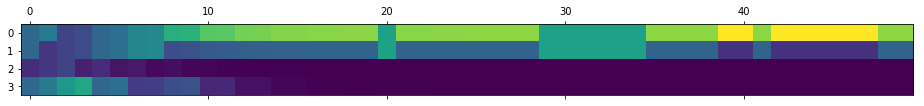

In [26]:
row_sums = X.sum(axis=1).reshape((T, 1))
X_norm = X / row_sums
plt.matshow(X_norm.transpose(), cmap=plt.cm.viridis)
plt.show()

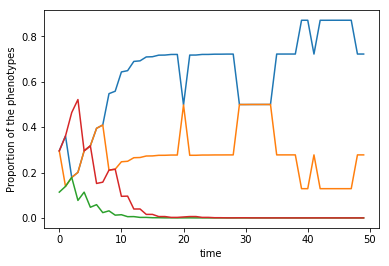

In [27]:
plt.plot(X_norm)
plt.ylabel('Proportion of the phenotypes')
plt.xlabel('time')
plt.show()

# The whole simulation:

Euler is unstable, try: 

$$ \Large x_0 = [1, 1, 1, 1]$$

with 

$$ \Large
A_{k} = diag(0.1, \dots , \underbrace{1}_{k}, \dots,  0.1)
$$

and 

$$ \Large \Delta_t = 1$$.

In [177]:
EMat = np.array([[0, 1, 1, 1], 
                 [1, 0, 1, 1],
                 [1, 1, 0, 1],
                 [1, 1, 1, 0]])

# number of enviroments and phenotypes
E = 4
P = 4

row_sums = EMat.sum(axis=1).reshape(E, 1)
Q = EMat / row_sums

H = np.diag([0.5]*P)
F = linalg.toeplitz([1, 0.1, 0.1, 0.1]) # only one strong phenotype for each enviroment
F = F[0:E, ] # only 4 enviroments

In [178]:
# x0[j]: Initial populition with phenotype j
x0 = np.array([1, 1, 1, 1])

# initial enviroment
enviroment = 1 

# Total time-steps
T = 10

X = np.zeros((T, P))
Enviroments = np.zeros(T)

for t in range(T):
    A = np.diag(F[enviroment]) - H
    X[t] = (A - np.diag([1]*P)).dot(x0)
    
    # updates for next time-step
    x0 = X[t]
    enviroment = 1 
    Enviroments[t] = enviroment 

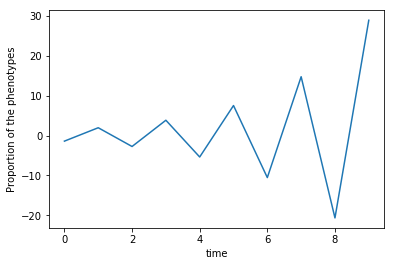

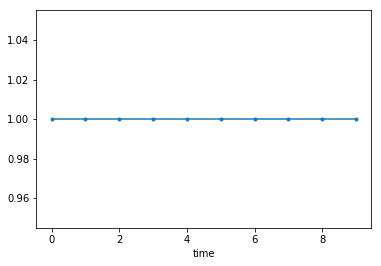

In [181]:
plt.plot(X[:, 0])
plt.ylabel('Proportion of the phenotypes')
plt.xlabel('time')
plt.show()

plt.plot(Enviroments, '.-')
plt.ylabel('')
plt.xlabel('time')
plt.show()

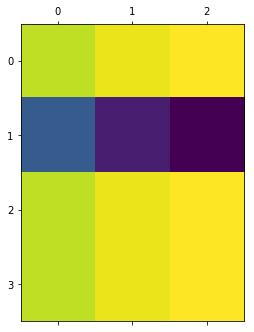

In [191]:
plt.matshow(X_norm.transpose(), cmap=plt.cm.viridis)
plt.show()

# An even simpler model: 

$$
\Large 
x(t + 1) = A_{\epsilon(t)} x(t)
$$

In [207]:
EMat = np.array([[0, 1, 1, 1], 
                 [1, 0, 1, 1],
                 [1, 1, 0, 1],
                 [1, 1, 1, 0]])

# number of enviroments and phenotypes
E = 4
P = 4

row_sums = EMat.sum(axis=1).reshape(E, 1)
Q = EMat / row_sums

H = np.diag([0.2]*P)
F = linalg.toeplitz([1, 0.1, 0.1, 0.1]) # only one strong phenotype for each enviroment
F = F[0:E, ] # only 4 enviroments

In [213]:
# x0[j]: Initial populition with phenotype j
x0 = np.array([1, 1, 1, 1])

# initial enviroment
enviroment = 1 

# Total time-steps
T = 10

X = np.zeros((T, P))
Enviroments = np.zeros(T)

for t in range(T):
    A = np.diag(F[enviroment]) - H
    X[t] = (A - np.diag([1]*P)).dot(x0)
    
    # updates for next time-step
    x0 = X[t]
    enviroment = 1 #next_enviroment(enviroment, Q) 
    Enviroments[t] = enviroment 

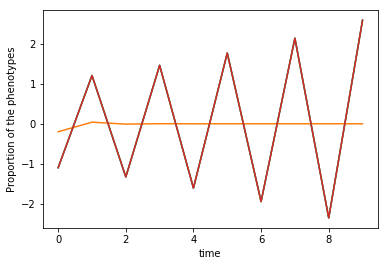

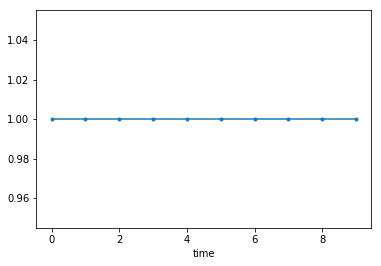

In [214]:
plt.plot(X)
plt.ylabel('Proportion of the phenotypes')
plt.xlabel('time')
plt.show()

plt.plot(Enviroments, '.-')
plt.ylabel('')
plt.xlabel('time')
plt.show()

# Runge Kutta

Need a better method

In [4]:
from functools import partial
from scipy.integrate import solve_ivp

In [5]:
def Aeps_x(t, x, enviroment, Q, F, H):
    
    '''
    inputs: 
        - t = time.
        - x[j] = # of cells with phenotype j in an enviroment. 
        - enviroment = number of enviroment. There are E in total.  
        - Q = ExE transition matrix of a Markov Chain.  
        - F = ExP matrix with growth rate of phenotypes for each enviroment. 
        - H = PxP matrix with the switching rates from phenotype i to j.
    '''
    E = Q.shape[0]
    P = F.shape[1]

    A = np.diag(F[enviroment]) - H
    
    dx = A.dot(x)
    
    return(dx)

In [6]:
EMat = np.array([[0, 1, 1, 1], 
                 [1, 0, 1, 1],
                 [1, 1, 0, 1],
                 [1, 1, 1, 0]])
E0 = EMat.shape[0]

row_sums = EMat.sum(axis=1).reshape(E0, 1)
Q = EMat / row_sums

F = linalg.toeplitz([1, 0.1, 0.1, 0.1]) # only one strong phenotype for each enviroment
F = F[0:E0, ] # only 4 enviroments

P0 = F.shape[1]
H = np.diag([0.5]*P0)

### Is Aeps_x working? and Partial  

In [7]:
t0 = 0
x0 = [20, 10, 2, 20]
e0 = 1

Aeps_x(t0, x0, e0, Q, F, H)

array([-8. ,  5. , -0.8, -8. ])

In [8]:
f = partial(Aeps_x, enviroment = e0, Q=Q, F=F, H=H)
f(1, x0)

array([-8. ,  5. , -0.8, -8. ])

In [17]:
next_envt = partial(next_enviroment, Q=Q)
next_envt(1)

1

# Solver with changing enviroment

Works for a fixed enviroment. 

In [10]:
sol_param = solve_ivp(
    partial(Aeps_x, enviroment = 0, Q=Q, F=F, H=H), (0, 4, 20), x0, dense_output=True)

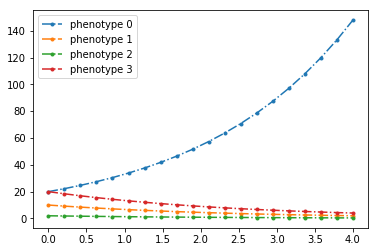

In [11]:
t = np.linspace(0, 4, num=20)

plt.plot(t, sol_param.sol(t)[0], '.-.', label='phenotype 0')
plt.plot(t, sol_param.sol(t)[1], '.-.', label='phenotype 1')
plt.plot(t, sol_param.sol(t)[2], '.-.', label='phenotype 2')
plt.plot(t, sol_param.sol(t)[3], '.-.', label='phenotype 3')
plt.legend()
plt.show()

## RK4 with random parameters

In [12]:
EMat = np.array([[10, 0.1], 
                 [0.1, 10]])

# number of enviroments and phenotypes
E = 2
P = 2

row_sums = EMat.sum(axis=1).reshape(E, 1)
Q = EMat / row_sums

H = np.array([[0, 0.05],
              [1e-6, 0]])

F = np.array([[2, -0.05], 
              [-0.05, 0.05]]) 

In [13]:
import scipy

N = 1000
tfinal = 25
t = np.linspace(start=0, stop=tfinal, num=N)
t0 = 0
x0 = [20, 20]
e0 = 0

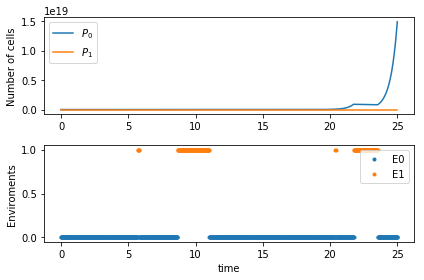

In [16]:
solver = scipy.integrate.ode(Aeps_x).set_integrator('dopri5', nsteps=100)
solver.set_initial_value(x0, t0).set_f_params(e0, Q, F, H)

sol = np.zeros((N, E))
sol[0] = x0
Enviroments = np.zeros(N)

k = 1
while solver.successful() and solver.t < tfinal:
    solver.integrate(t[k])
    sol[k] = solver.y
    k += 1
    
    Enviroments[k-1] = e0
    
    e0 =  next_enviroment(e0, Q=Q)
    solver.set_f_params(e0, Q, F, H)
    
    
plt.subplot(211)
plt.plot(t, sol[:,0], label='$P_0$')
plt.plot(t, sol[:,1], label='$P_1$')
plt.ylabel('Number of cells')
plt.legend()


E0 = np.copy(Enviroments)
E1 = np.copy(Enviroments)
E0[Enviroments == 1] = np.nan
E1[Enviroments == 0] = np.nan

plt.subplot(212)
plt.plot(t, E0, '.', label = 'E0')
plt.plot(t, E1, '.', label = 'E1')
plt.ylabel('Enviroments')
plt.xlabel('time')
plt.legend()

plt.tight_layout()
plt.savefig('twoPhenotypes.png', format='png', dpi=500)
plt.show()